### Exp-7: Time-series: AR, MA and ARMA modelling, Case-study: Average temperature forecasting.

- AR(auto regressive)- P: Order of auto regressive model
- I(Integrated)- D: degree of Differencing
- MA(Moving Average)- Q: order of moving average

- t-1: lag constant
- alpha: significance

- Moving average: fluctuation around the constant mean
- Future forecast are dependent on the previous error
- the error is normally distributed(standard normal distribution(0,1))
- MA(q): q number of errors

- I: differencing in time series

- ARIMA model only works for a stationary time series


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime,timedelta
register_matplotlib_converters()

In [4]:
errors=np.random.normal(0,1,400)
date_index=pd.date_range(start='9/1/2019',end='1/1/2020')

In [6]:
mu=50
series=[]
for t in range(1,len(date_index)+1):
    series.append(mu+0.4*errors[t-1]+0.3*errors[t-2]+errors[t])

In [8]:
series=pd.Series(series,date_index)
series=series.asfreq(pd.infer_freq(series.index))

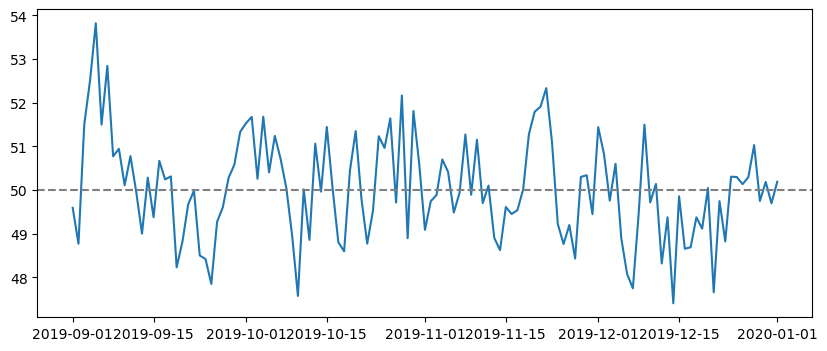

In [9]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu,linestyle='--',color='grey')

<BarContainer object of 10 artists>

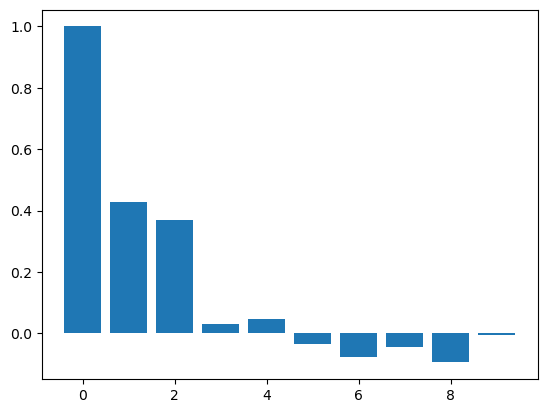

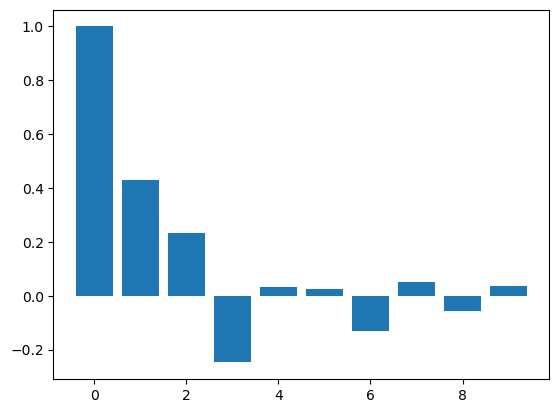

In [10]:
acf_vals=acf(series)
pacf_vals=pacf(series)
num_lags=10
plt.figure()
plt.bar(range(num_lags),acf_vals[:num_lags])
plt.figure()
plt.bar(range(num_lags),pacf_vals[:num_lags])

## Augmented Dickey Fuller Test to test Stationary of a time-series

In [12]:
df=pd.read_csv('D:\SEM 3\Python for Data Science\yahoo_stock.csv')

In [13]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [15]:
ts=df['High']

In [17]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Perform the Dickey_Fuller test
    result=adfuller(timeseries,autolag='AIC')
    # Extract and print test results
    print('Results of Dickey-Fuller Test:')
    dfoutput=pd.Series(result[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in result[4].items():
        dfoutput[f'Critical Value ({key})']=value
    print(dfoutput)

test_stationarity(ts) #compare Test Statistic with Critical values-> if greater accept null hypothesis: stationary

Results of Dickey-Fuller Test:
Test Statistic                   -0.713598
p-value                           0.843196
#Lags Used                       25.000000
Number of Observations Used    1799.000000
Critical Value (1%)              -3.433990
Critical Value (5%)              -2.863148
Critical Value (10%)             -2.567626
dtype: float64


C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


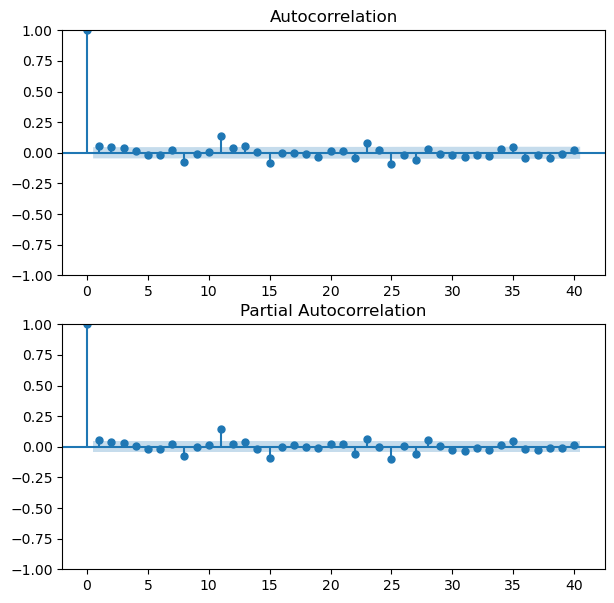

In [19]:
#differencing: p=1,q=1,d=0
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plot_acf(ts.diff().dropna(),lags=40,ax=plt.gca())
plt.subplot(2,1,2)
plot_pacf(ts.diff().dropna(),lags=40,ax=plt.gca())
plt.show()

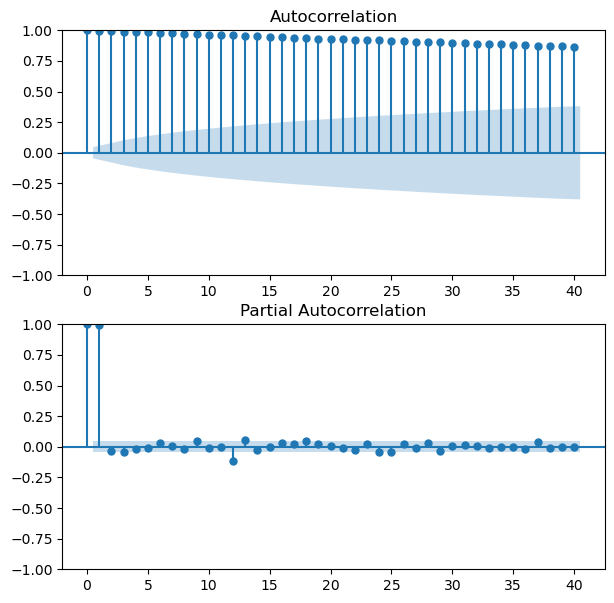

In [21]:
#No differencing
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plot_acf(ts.dropna(),lags=40,ax=plt.gca())
plt.subplot(2,1,2)
plot_pacf(ts.dropna(),lags=40,ax=plt.gca())
plt.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117


In [26]:
df.index=df['Date']

In [27]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2015-11-23,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


In [28]:
del df['Date']

In [29]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


In [31]:
p=1
q=1
d=0
model=ARIMA(df.iloc[:-100,0],order=(p,d,q))
results=model.fit()
print(results.summary())

C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 1725
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7597.305
Date:                Thu, 10 Aug 2023   AIC                          15202.610
Time:                        10:07:14   BIC                          15224.422
Sample:                    11-23-2015   HQIC                         15210.679
                         - 08-12-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2615.1809    360.565      7.253      0.000    1908.486    3321.876
ar.L1          0.9991      0.002    658.019      0.000       0.996       1.002
ma.L1          0.0680      0.010      6.979      0.0

In [32]:
n_periods=100 #shorter periods ARIMA process works better
forecast_values=results.forecast(steps=n_periods)
print(forecast_values)

2020-08-13    3387.604036
2020-08-14    3386.883721
2020-08-15    3386.164077
2020-08-16    3385.445104
2020-08-17    3384.726802
                 ...     
2020-11-16    3322.088422
2020-11-17    3321.429202
2020-11-18    3320.770597
2020-11-19    3320.112606
2020-11-20    3319.455229
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


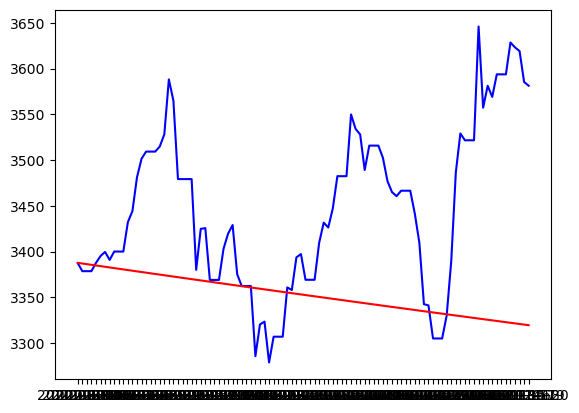

In [34]:
plt.plot(df.iloc[-100:,0],color="blue")
plt.plot(df.index[-100:],forecast_values,color="red")

In [50]:
p=6
q=4
d=0
model1=ARIMA(df.iloc[:-100,0],order=(p,d,q))
results1=model1.fit()
print(results1.summary())

C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 1725
Model:                 ARIMA(6, 0, 4)   Log Likelihood               -7581.496
Date:                Thu, 10 Aug 2023   AIC                          15186.992
Time:                        10:27:37   BIC                          15252.427
Sample:                    11-23-2015   HQIC                         15211.198
                         - 08-12-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2615.1811   2329.685      1.123      0.262   -1950.918    7181.280
ar.L1         -0.5010      0.032    -15.567      0.000      -0.564      -0.438
ar.L2          0.0314      0.041      0.769      0.4

C:\Users\ramit\anaconda\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
n_periods1=100 #shorter periods ARIMA process works better
forecast_values1=results1.forecast(steps=n_periods1)
print(forecast_values1)

2020-08-13    3386.413428
2020-08-14    3390.205451
2020-08-15    3388.449658
2020-08-16    3386.688726
2020-08-17    3387.708221
                 ...     
2020-11-16    3369.253694
2020-11-17    3369.100183
2020-11-18    3368.818356
2020-11-19    3368.712413
2020-11-20    3368.411963
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


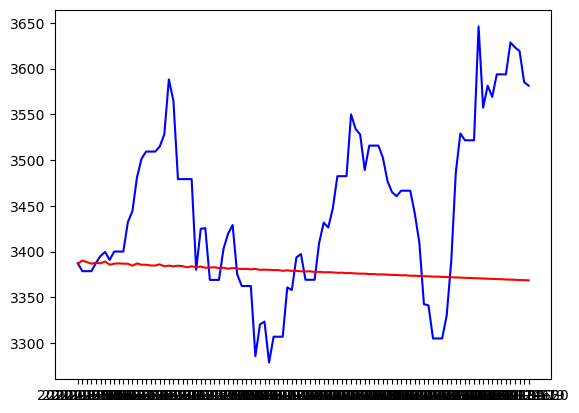

In [52]:
plt.plot(df.iloc[-100:,0],color="blue")
plt.plot(df.index[-100:],forecast_values1,color="red")